# 영어/한국어 Word2Vec
    
    gensim 패키지에서 Word2Vec 이 이미 구현되어 있음으로, 별도 구현없이 쉽게 훈련가능

## 1. 영어 Word2Vec
    
    

### 1) 데이터 처리

In [4]:
# 훈련 데이터 다운로드
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", 
                           filename="ted_en-20160408.xml")


('ted_en-20160408.xml', <http.client.HTTPMessage at 0x121154a00>)

In [8]:
# 데이터 전처리
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

targetXML = open('ted_en-20160408.xml','r',encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content> </content> 사이 내용 가져오기.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# content 중간 배경음 부분 제거
content_text = re.sub(r'\([^)]*\)','',parse_text)

# 입력 코퍼스에 대해서 nltk 사용 토큰화 후 구두점 제거, 대문자->소문자
sent_text = sent_tokenize(content_text)

normalized_text = []
for string in sent_text :
    tokens = re.sub(r"[^a-z0-9]+"," ",string.lower())
    normalized_text.append(tokens)

    
result = [word_tokenize(sentence) for sentence in normalized_text]

In [9]:
print(len(result))

273424


### 2) Word2Vec 학습

In [10]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=result,size=100,window=5,
                 min_count=5,workers=4,sg=0)

'''
size : 임베딩 된 벡터의 차원
window : 컨텍스트 윈도우 크기
min_count : 단어 최소 빈도 수 제한
workers : 학습을 위한 프로세스 수
sg : 0 - CBOW / 1 - Skip-gram
'''

'\nsize : 임베딩 된 벡터의 차원\nwindow : 컨텍스트 윈도우 크기\nmin_count : 단어 최소 빈도 수 제한\nworkers : 학습을 위한 프로세스 수\nsg : 0 - CBOW / 1 - Skip-gram\n'

In [11]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8569543361663818), ('guy', 0.8265942335128784), ('lady', 0.7929710149765015), ('girl', 0.7545343637466431), ('boy', 0.7531996965408325), ('gentleman', 0.729660153388977), ('soldier', 0.7059091925621033), ('kid', 0.6995912790298462), ('poet', 0.6954246759414673), ('son', 0.6778672337532043)]


### 3) 모델 저장하기/불러오기

In [13]:
from gensim.models import KeyedVectors

# 모델 저장
model.wv.save_word2vec_format('eng_w2v')

# 모델 로드
loaded = KeyedVectors.load_word2vec_format('eng_w2v')

## 2. 한국어 Word2Vec

### 1) 데이터 처리

In [15]:
import urllib.request
import pandas as pd
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",
                           filename="ratings.txt")

train_data = pd.read_table("ratings.txt")

In [17]:
print(len(train_data))
train_data.head()

200000


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [19]:
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [22]:
train_data = train_data.dropna()

In [23]:
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [25]:
# 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과',
             '도','를','으로','자','에','와','한','하다']

# OKT 사용한 토큰화
from konlpy.tag import Okt
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp = okt.morphs(sentence,stem=True)
    temp = [word for word in temp if word not in stopwords]
    tokenized_data.append(temp)

<ipython-input-25-e28dc94ecc1d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")


Max length of reviews :  68
Mean length of reviews :  10.669446777871116


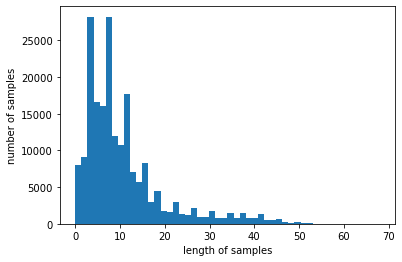

In [26]:
# 리뷰 길이 분포 확인
import matplotlib.pyplot as plt
print("Max length of reviews : ",max(len(l) for l in tokenized_data))
print("Mean length of reviews : ",sum(map(len,tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 2) Word2Vec 학습

In [27]:
from gensim.models import Word2Vec

model = Word2Vec(sentences= tokenized_data, size = 100, window = 5,
                min_count = 5, workers = 4, sg = 0)

print(model.wv.most_similar("최민식"))

[('김명민', 0.8485106229782104), ('한석규', 0.844343364238739), ('미스캐스팅', 0.8420721292495728), ('김창완', 0.8414918184280396), ('안성기', 0.8403347730636597), ('송강호', 0.8390622735023499), ('설경구', 0.8350478410720825), ('능청', 0.8320046663284302), ('노튼', 0.8256185054779053), ('정재영', 0.8203049898147583)]
